# Cryptocurrency Data Explorer
This is a Python-based cryptocurrency data analysis tool that leverages NumPy, Pandas, Matplotlib, and Seaborn to process the Kaggle "Cryptocurrency Market Analysis" dataset. It helps understand cryptocurrency market trends and behaviors.

## 1.Import Dependent Libraries
First, import the required Python libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans']
# matplotlib.rcParams['font.sans-serif'] = ['Arial Unicode MS']
matplotlib.rcParams['axes.unicode_minus'] = False

## 2.Data Loading and Preprocessing Functions



### 2.1 Data Reading & Data Preprocessing
- Function Introduction: Load the cryptocurrency CSV dataset and complete preprocessing (date format conversion, missing value handling, necessary field checking)
- Parameter Description: <br>
  file_path: str - Dataset file path (e.g., "cryptocurrency_data.csv")

- Return Value: <br>
  df: DataFrame - Preprocessed cryptocurrency data, including core fields such as date, price, and trading volume
  
- Exception Handling: <br>
  FileNotFoundError: Triggered when the file path is invalid<br>
  ValueError: Triggered when the dataset lacks necessary fields<br>
  RuntimeError: Triggered when other loading exceptions occur

In [16]:
def load_data(file_path):
    try:
        # 1. Load CSV data
        df = pd.read_csv(file_path)

         # 2. Check necessary fields (ensure the date column is included)
        required_cols = ['date', 'name', 'close', 'volume', 'open', 'high', 'low', 'market']
        missing_cols = [col for col in required_cols if col not in df.columns]
        if missing_cols:
            raise ValueError(f"The dataset lacks necessary fields, please supplement: {', '.join(missing_cols)}")
        
        # Record the total number of rows before conversion
        total_rows_before = len(df)
        # Conversion logic: errors='coerce' marks invalid dates as NaT
        df['date'] = pd.to_datetime(
            df['date'], 
            errors='coerce'
        )
        
        # Rename columns to match subsequent analysis habits
        df.rename(columns={
            'name': 'Currency Name',
            'close': 'Close',
            'volume': 'Volume',
            'open': 'Open',
            'high': 'High',
            'low': 'Low',
            'market': 'Market Cap',
            'date': 'Date'
        }, inplace=True)
        
        # 5. Clean invalid data: Delete rows with missing date, closing price, or trading volume
        df = df.dropna(subset=['Date', 'Close', 'Volume'])
        df.reset_index(drop=True, inplace=True)
        
        # 6. Output final results
        print(f"✅ Data loading completed!")
        print(f"📈 Valid data scale: {len(df)} records (deleted {total_rows_before - len(df)} invalid records)")
        print(f"⏰ Time range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
        return df
    
    except FileNotFoundError:
        raise FileNotFoundError(f"❌ Invalid file path: {file_path}, please check if the file exists (e.g., './crypto_data.csv')")
    except Exception as e:
        raise RuntimeError(f"❌ Data loading failed：{str(e)}")
# df = load_data(file_path="crypto-markets.csv")

## 3. Basic Analysis

### 3.1 User Currency Input Processing and Validation Function
- Function Introduction: Obtain the currencies selected by the user through 2 input boxes, with complete validation logic. Input Box 1: Enter the currencies for basic analysis and data visualization; Input Box 2: Enter 2 currencies for volatility/correlation analysis

- Parameter Description: <br>
    df: pd.DataFrame - Preprocessed data

- Return Value: <br>
    basic_analysis_list: list - Currencies selected in Input Box 1<br>
    correlation_analysis_list: list - Currencies selected in Input Box 2

In [17]:
def get_currency_input(df):
    # Get available currencies in the dataset and convert to an ordered list for user viewing
    available_currencies = sorted(df['Currency Name'].unique())
    # Format the available currency prompt (each currency is left-aligned with 50 characters to avoid messy display)
    available_curr_str = " ".join([f"{curr:<50}" for curr in available_currencies])
    
    # -------------------------- Input Box 1: All Currencies for Analysis --------------------------
    while True:
        # Prompt the user for input format and available currency range
        currency_input = input(
            "\n[Input Box 1: Please enter the currencies for basic analysis and data visualization]\n"
            "Enter 1-20 currencies (separated by '/', e.g., Bitcoin/Ethereum): "
        ).strip()
        # Split input and filter out empty values (avoid empty elements caused by users entering extra '/')
        basic_analysis_list = [curr.strip() for curr in currency_input.split('/') if curr.strip()]

        # Validation 1: The number of currencies should be between 1 and 20 (meeting the potential requirement of "testing at least 5 currencies" in the assignment, while avoiding excessive data volume)
        if len(basic_analysis_list) < 1:
            print("❌ Select at least 1 currency, please re-enter!")
            continue
        if len(basic_analysis_list) > 20:
            print("❌ Select a maximum of 20 currencies to avoid low analysis efficiency, please re-enter!")
            continue
        
        # Validation 2: Check if all entered currencies are in the available list
        invalid_curr = [curr for curr in basic_analysis_list if curr not in available_currencies]
        if invalid_curr:
            print(f"❌ The following entered currencies are invalid: {', '.join(invalid_curr)}")
            print("========================= Available Cryptocurrencies in the Dataset =========================")
            print(available_curr_str)
            print("========================== The Above Are Available Cryptocurrencies in the Dataset =============================")
            continue
        
        # All validations passed, exit the loop for Input Box 1
        print(f"✅ Input Box 1 Confirmed: Currencies for basic analysis and data visualization are {', '.join(basic_analysis_list)}")
        break

    # -------------------------- Input Box 2: 2 Currencies (for Volatility/Correlation Analysis) --------------------------
    while True:
        # Prompt the user for input format, and associate with the selection in Input Box 1 (it is recommended to select from the selected currencies to ensure analysis consistency)
        corr_vol_input = input(
            "\n[Input Box 2: Please enter 2 currencies for volatility/correlation analysis]\n"
            "Enter 2 currencies (separated by '/', e.g., Bitcoin/Ethereum): "
        ).strip()

        # Split input and filter out empty values
        correlation_analysis_list = [curr.strip() for curr in corr_vol_input.split('/') if curr.strip()]

        # Validation 1: Must enter 2 currencies (as required by the assignment: "calculate the volatility or correlation of two selected currencies")
        if len(correlation_analysis_list) != 2:
            print("❌ Must select 2 currencies, please re-enter!")
            continue

        # Validation 2: The 2 currencies cannot be the same
        if correlation_analysis_list[0] == correlation_analysis_list[1]:
            print("❌ Cannot select the same currency, please re-enter!")
            continue
        
        # Validation 3: Currencies must be in the available list
        invalid_corr_vol = [curr for curr in correlation_analysis_list if curr not in available_currencies]
        if invalid_corr_vol:
            print(f"❌ The following entered currencies are invalid: {', '.join(invalid_corr_vol)}")
            print("========================= Available Cryptocurrencies in the Dataset =========================")
            print(available_curr_str)
            print("========================== The Above Are Available Cryptocurrencies in the Dataset =============================")
            continue
        
        # All validations passed, exit the loop for Input Box 2
        print(f"✅ Input Box 2 Confirmed: The currency pair for analysis is {correlation_analysis_list[0]} / {correlation_analysis_list[1]}")
        break

    return basic_analysis_list, correlation_analysis_list

# basic_analysis_list, correlation_analysis_list = get_currency_input(df)

### 3.2 Basic Analysis Function
- Main Function Introduction: Basic Analysis with NumPy/Pandas

- Parameter Description: <br>
  df: pd.DataFrame - Preprocessed data<br>
  basic_analysis_list: list - All currencies selected in Input Box 1<br>
  correlation_analysis_list: list - 2 currencies selected in Input Box 2
  
- Return Value: <br>
  result: dict - Dictionary of analysis results, including statistical indicators, volatility/correlation data, etc.

In [19]:
def basic_analysis(df, basic_analysis_list, correlation_analysis_list):
    # 1. Filter data of all selected currencies for analysis (ensure only the range selected by the user is analyzed)
    df_basic = df[df['Currency Name'].isin(basic_analysis_list)].copy()
    
    # 2. Calculate daily returns (as required by the assignment, formula: (current day's closing price - previous day's closing price) / previous day's closing price)
    # Calculate by currency group to avoid cross-data of different currencies
    df_basic['Daily Returns'] = df_basic.groupby('Currency Name')['Close'].pct_change()
    
    # 3. Calculate core statistical indicators (closing price/daily return/trading volume as required by the assignment)
    core_stats = df_basic.groupby('Currency Name').agg({
        'Close': ['mean', 'median', 'std', 'min', 'max'],  # Closing price statistics (reflecting price level)
        'Daily Returns': ['mean', 'median', 'std', 'min', 'max'],  # Daily returns (reflecting return risk)
        'Volume': ['mean', 'median', 'std', 'min', 'max']  # Trading volume (reflecting market activity)
    }).round(4) # Keep 4 decimal places to improve readability
    
    # Rename columns (avoid multi-level column names for easier subsequent viewing)
    core_stats.columns = [
        'Close_Price_Mean', 'Close_Price_Median', 'Close_Price_Std', 'Close_Price_Min', 'Close_Price_Max',
        'Daily_Returns_Mean', 'Daily_Returns_Median', 'Daily_Returns_Std', 'Daily_Returns_Min', 'Daily_Returns_Max',
        'Volume_Mean', 'Volume_Median', 'Volume_Std', 'Volume_Min', 'Volume_Max'
    ]
    
    # 4. Identify the top 5 currencies by average trading volume; if the user selects fewer than 5 currencies, take all (explicitly required by the assignment)
    top5_volume = df_basic.groupby('Currency Name')['Volume'].mean().sort_values(ascending=False).head(5)
    
    # 5: Volatility and correlation analysis of the specified 2 currencies
    # 5.1 Filter closing price data of these 2 currencies (align dates to avoid analysis bias)
    df_corr = df[df['Currency Name'].isin(correlation_analysis_list)].copy()
    # Reshape to "date-currency" wide format (facilitate correlation and rolling indicator calculation)
    pivot_close = df_corr.pivot(index='Date', columns='Currency Name', values='Close')
    # Handle missing values generated by rolling calculation
    pivot_close = pivot_close.dropna()
    
    # 5.2 Calculate Pearson correlation coefficient (reflecting the degree of price linkage between the two currencies, range [-1,1])
    corr_coef = pivot_close.corr().iloc[0, 1].round(4)
    # Interpretation of correlation strength (help users understand the result, e.g., >0.7 is strong positive correlation)
    if corr_coef > 0.7:
        corr_desc = "Strong Positive Correlation"
    elif corr_coef > 0.3:
        corr_desc = "Moderate Positive Correlation"
    elif corr_coef > 0:
        corr_desc = "Weak Positive Correlation"
    elif corr_coef > -0.3:
        corr_desc = "Weak Negative Correlation"
    elif corr_coef > -0.7:
        corr_desc = "Moderate Negative Correlation"
    else:
        corr_desc = "Strong Negative Correlation"
    
    # 5.3 Calculate volatility (20-day rolling standard deviation, a commonly used short-term volatility indicator in financial markets, as required by the assignment)
    volatility = pivot_close.rolling(window=20).std().round(4)
    # Volatility statistics (mean/max/min, reflecting volatility characteristics)
    volatility_stats = volatility.agg(['mean', 'max', 'min']).round(4)
    volatility_stats.columns = [f'{curr}_Volatility' for curr in correlation_analysis_list]
    
    # 6. Organize and return results (integrate all analysis results into a dictionary for subsequent visualization calls)
    result = {
        'core_stats': core_stats,  # Core statistical indicators of all currencies
        'top5_volume': top5_volume,  # Top 5 currencies by trading volume
        'daily_returns_df': df_basic[['Date', 'Currency Name', 'Daily Returns']].dropna(),  # Daily return data
        'all_filtered_df': df_basic,
        # Volatility and correlation results
        'corr_vol_result': {
            'currency_pair': correlation_analysis_list,
            'correlation_coef': corr_coef,
            'correlation_desc': corr_desc,
            'volatility_df': volatility,
            'volatility_stats': volatility_stats
        }
    }
    return result
# Aesthetic and readable output function
def print_analysis_results(core_stats, corr_vol_result):
    # ========== Output Core Statistical Indicators ==========
    print("\n" + "📊 Core Statistical Analysis Results".center(100))
    print("="*100)
    
    for currency in core_stats.index:
        print(f"\n📊 【{currency}】Statistical Details")
        
        # 1. Closing Price Statistics
        print("\n🔹 Closing Price Statistics (Price Level)")
        print("-"*80)
        print(f"{'Mean':<10} | {core_stats.loc[currency, 'Close_Price_Mean']:>20}")
        print(f"{'Median':<10} | {core_stats.loc[currency, 'Close_Price_Median']:>20}")
        print(f"{'Std (Volatility)':<10} | {core_stats.loc[currency, 'Close_Price_Std']:>20}")
        print(f"{'Min':<10} | {core_stats.loc[currency, 'Close_Price_Min']:>20}")
        print(f"{'Max':<10} | {core_stats.loc[currency, 'Close_Price_Max']:>20}")
        print("-"*80)

        # 2. Daily Returns Statistics
        print("\n🔹 Daily Returns Statistics (Return and Risk)")
        print("-"*80)
        print(f"{'Mean (Return)':<10} | {core_stats.loc[currency, 'Daily_Returns_Mean']:>20}")
        print(f"{'Median':<10} | {core_stats.loc[currency, 'Daily_Returns_Median']:>20}")
        print(f"{'Std (Risk)':<10} | {core_stats.loc[currency, 'Daily_Returns_Std']:>20}")
        print(f"{'Min (Max Loss)':<10} | {core_stats.loc[currency, 'Daily_Returns_Min']:>20}")
        print(f"{'Max (Max Profit)':<10} | {core_stats.loc[currency, 'Daily_Returns_Max']:>20}")
        print("-"*80)

        
        # 3. Trading Volume Statistics
        print("\n🔹 Trading Volume Statistics (Market Activity)")
        print("-"*80)
        print(f"{'Mean':<10} | {core_stats.loc[currency, 'Volume_Mean']:>20}")
        print(f"{'Median':<10} | {core_stats.loc[currency, 'Volume_Median']:>20}")
        print(f"{'Std (Liquidity Volatility)':<10} | {core_stats.loc[currency, 'Volume_Std']:>20}")
        print(f"{'Min':<10} | {core_stats.loc[currency, 'Volume_Min']:>20}")
        print(f"{'Max':<10} | {core_stats.loc[currency, 'Volume_Max']:>20}")
        print("-"*80)
    
    # ========== Output Correlation and Volatility Analysis ==========
    print("\n" + "📉 Correlation and Volatility Analysis Results".center(100))
    print("="*100)
    
    # 1. Correlation Results
    pair = corr_vol_result['currency_pair']
    coef = corr_vol_result['correlation_coef']
    desc = corr_vol_result['correlation_desc']
    print(f"\n🔹 Currency Pair: {pair[0]} & {pair[1]}")
    print(f"   Correlation Coefficient: {coef} ({desc})")
    
    # 2. Volatility Results
    print("\n🔹 20-Day Rolling Standard Deviation Statistics (Volatility)")
    print("-"*80)
    print(corr_vol_result['volatility_stats'])
    print("-"*80)
# analysis_result = basic_analysis(df, basic_analysis_list, correlation_analysis_list)
# print_analysis_results(analysis_result['core_stats'],analysis_result['corr_vol_result'])

### 3.3 Visualization Analysis Function
- Function Introduction: Visualization

- Parameter Description: <br>
    analysis_result: dict - Dictionary of basic analysis results (including basic statistics, volatility/correlation results)

- Return Value: <br>
    figs: list - List of charts, each element is a tuple (chart name, chart object)

In [20]:
def visualization_analysis(analysis_result):
    figs = []
    # Extract basic analysis data
    top5_currencies = analysis_result['top5_volume'].index.tolist()
    df_all_filtered = analysis_result['all_filtered_df']
    daily_returns = analysis_result['daily_returns_df']
    # Extract volatility and correlation analysis data
    corr_vol_data = analysis_result['corr_vol_result']
    currency_pair = corr_vol_data['currency_pair']
    volatility = corr_vol_data['volatility_df']
    corr_coef = corr_vol_data['correlation_coef']
    
    # ===================== 📈 1. Close Price Trend of Top 5 Cryptocurrencies by Volume =====================
    fig1, ax1 = plt.subplots(figsize=(12, 6))
    for curr in top5_currencies:
        curr_data = df_all_filtered[df_all_filtered['Currency Name'] == curr].sort_values('Date')
        ax1.plot(curr_data['Date'], curr_data['Close'], label=curr, linewidth=1.5, alpha=0.8)
    ax1.set_title('Top 5 Volume Cryptocurrencies Close Price Trend', fontsize=14, fontweight='bold', pad=20)
    ax1.set_xlabel('Date', fontsize=12)
    ax1.set_ylabel('Close Price (USD)', fontsize=12)
    ax1.legend(loc='best', fontsize=10)
    ax1.grid(True, alpha=0.1, linestyle='--')
    plt.tight_layout()
    print("\n" + "📉 Chart 1: Close Price Trend of Top 5 Cryptocurrencies by Volume".center(100))
    print("="*100)
    print("Shows the trend of closing prices of the top 5 cryptocurrencies by volume over time, allowing intuitive comparison of price fluctuations and long-term trends.")
    plt.show()
    figs.append(('1. Top5 Close Price Line Chart', fig1))
    
    # ===================== 📊 2. Daily Returns Histogram (Dynamic Quantity, Adjusted with Input Currencies) =====================
    daily_returns_top5 = daily_returns[daily_returns['Currency Name'].isin(top5_currencies)]
    n = len(top5_currencies)
    rows = (n + 2) // 3
    cols = min(3, n) if n > 0 else 1
    fig2, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
    axes = axes.flatten() if n > 1 else [axes]
    
    for i, curr in enumerate(top5_currencies):
        curr_returns = daily_returns_top5[daily_returns_top5['Currency Name'] == curr]['Daily Returns']
        axes[i].hist(curr_returns, bins=50, alpha=0.7, edgecolor='black', linewidth=0.5)
        axes[i].set_title(f'{curr} Daily Returns Distribution', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Daily Returns', fontsize=10)
        axes[i].set_ylabel('Frequency', fontsize=10)
        axes[i].grid(True, alpha=0.3, linestyle='--')
    
    for i in range(n, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    print("\n" + "📊 Chart 2: Daily Returns Histogram".center(100))
    print("="*100)
    print(f"Shows the daily return distribution of {len(top5_currencies)} cryptocurrencies, reflecting the volatility characteristics and probability distribution of returns.")
    plt.show()
    figs.append(('2. Daily Returns Histograms', fig2))
    
    # ===================== 🔥 3. Close Price Correlation Heatmap of Top 5 Cryptocurrencies by Volume =====================
    df_top5_pivot = df_all_filtered[df_all_filtered['Currency Name'].isin(top5_currencies)].pivot(
        index='Date', columns='Currency Name', values='Close'
    )
    corr_matrix_top5 = df_top5_pivot.corr().round(4)
    fig3, ax3 = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        corr_matrix_top5, annot=True, cmap='RdYlBu_r', center=0,
        square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax3
    )
    ax3.set_title('Close Price Correlation Heatmap (Top 5 Volume)', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    print("\n" + "🔥 Chart 3: Close Price Correlation Heatmap of Top 5 Cryptocurrencies by Volume".center(100))
    print("="*100)
    print("Uses a heatmap to show the Pearson correlation coefficient of closing prices of the top 5 cryptocurrencies; the color depth reflects the strength of correlation (red for positive, blue for negative).")
    plt.show()
    figs.append(('3. Top5 Correlation Heatmap', fig3))
    
    # ===================== 📦 4. 20-Day Volatility Distribution of Top 5 Cryptocurrencies by Volume (Box Plot) =====================
    volatility_top5 = []
    for curr in top5_currencies:
        curr_data = df_all_filtered[df_all_filtered['Currency Name'] == curr].copy()
        curr_data['Volatility'] = curr_data['Close'].rolling(window=20).std()
        volatility_top5.append(curr_data['Volatility'].dropna())
    fig4, ax4 = plt.subplots(figsize=(12, 6))
    box_plot = ax4.boxplot(volatility_top5, tick_labels=top5_currencies, patch_artist=True)
    for patch, color in zip(box_plot['boxes'], plt.cm.Set3(np.linspace(0, 1, len(top5_currencies)))):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    ax4.set_title('20-Day Volatility Distribution (Top 5 Volume)', fontsize=14, fontweight='bold', pad=20)
    ax4.set_xlabel('Cryptocurrency', fontsize=12)
    ax4.set_ylabel('20-Day Rolling Std (Volatility)', fontsize=12)
    ax4.grid(True, alpha=0.3, linestyle='--', axis='y')
    plt.tight_layout()
    print("\n" + "📦 Chart 4: 20-Day Volatility Distribution of Top 5 Cryptocurrencies by Volume (Box Plot)".center(100))
    print("="*100)
    print("Uses a box plot to show the 20-day rolling standard deviation (volatility) of the top 5 cryptocurrencies; the box reflects the median, quartiles, and outliers of volatility.")
    plt.show()
    figs.append(('4. Top5 Volatility Boxplot', fig4))
    
    # ===================== 🔄 5. Price and Volume Pair Plot (First Cryptocurrency in Top 5) =====================
    if top5_currencies:
        first_curr = top5_currencies[0]
        curr_data = df_all_filtered[df_all_filtered['Currency Name'] == first_curr].copy()
        curr_data['Log Volume'] = np.log1p(curr_data['Volume'])
        pair_vars = ['Close', 'Log Volume', 'Open', 'High', 'Low']
        fig5 = sns.pairplot(
            curr_data[pair_vars].dropna(),
            diag_kind='kde',
            plot_kws={'alpha': 0.5, 's': 20}
        )
        fig5.fig.suptitle(f'{first_curr} Price & Volume Pairplot (Log Volume)', fontsize=14, fontweight='bold', y=1.02)
        plt.tight_layout()
        title5_text = f"🔄 Chart 5: {first_curr} Price and Volume Pair Plot"
        print("\n" + title5_text.center(100))
        print("="*100)
        print("Shows the pairwise relationships between closing price, logarithmic trading volume, opening price, highest price, and lowest price of a single cryptocurrency; the diagonal shows the kernel density distribution.")
        plt.show()
        figs.append(('5. Price-Volume Pairplot', fig5))
    
    # ===================== 📊 6. 20-Day Volatility Comparison Line Chart of Specified Currency Pair =====================
    fig6, ax6 = plt.subplots(figsize=(12, 6))
    for curr in currency_pair:
        ax6.plot(
            volatility.index, volatility[curr],
            label=f'{curr} (20-Day Volatility)', linewidth=1.5, alpha=0.8
        )
    ax6.set_title(f'20-Day Volatility Comparison: {currency_pair[0]} vs {currency_pair[1]}', fontsize=14, fontweight='bold', pad=20)
    ax6.set_xlabel('Date', fontsize=12)
    ax6.set_ylabel('20-Day Rolling Std (Volatility)', fontsize=12)
    ax6.legend(loc='best', fontsize=10)
    ax6.grid(True, alpha=0.3, linestyle='--')
    plt.tight_layout()
    title6_text = f"📊 Chart 6: 20-Day Volatility Comparison between {currency_pair[0]} and {currency_pair[1]}"
    print("\n" + title6_text.center(100))
    print("="*100)
    print("Compares the 20-day rolling standard deviation (volatility) of two cryptocurrencies, allowing intuitive observation of the synchronization and differences in volatility.")
    plt.show()
    figs.append(('6. Selected Pair Volatility Comparison', fig6))
    
    # ===================== 🔥 7. Close Price Correlation Heatmap of Specified Currency Pair =====================
    df_pair = df_all_filtered[df_all_filtered['Currency Name'].isin(currency_pair)].pivot(
        index='Date', columns='Currency Name', values='Close'
    )
    corr_matrix_pair = df_pair.corr().round(4)
    fig7, ax7 = plt.subplots(figsize=(6, 4))
    sns.heatmap(
        corr_matrix_pair, annot=True, cmap='RdYlBu_r', center=0,
        square=True, linewidths=0.5, cbar_kws={"shrink": 0.6}, ax=ax7,
        annot_kws={'fontsize': 12}
    )
    ax7.set_title(
        f'Price Correlation: {currency_pair[0]} vs {currency_pair[1]}\n(Pearson Coefficient: {corr_coef})',
        fontsize=12, fontweight='bold', pad=15
    )
    plt.tight_layout()
    title7_text = f"🔥 Chart 7: Close Price Correlation Heatmap between {currency_pair[0]} and {currency_pair[1]}"
    print("\n" + title7_text.center(100))
    print("="*100)
    print(f"Focuses on the closing price correlation of two cryptocurrencies, marking the Pearson coefficient (currently {corr_coef}) to intuitively reflect the degree of linkage.")
    plt.show()
    figs.append(('7. Selected Pair Correlation Heatmap', fig7))
    
    print(f"\n✅ Visualization completed! A total of {len(figs)} charts were generated")
    return figs

# visualization_analysis(analysis_result)

## 4. Creative Function (In-depth Analysis of Single Cryptocurrency + Specified Time Period)

Helps users deeply understand the development rules of a single cryptocurrency from 4 dimensions: "trend, risk, price-volume relationship, and return", which can be used for investment decision-making or market research.

### 4.1 Currency Selection and Time Input Function
- Function Introduction: First, let the user select 1 cryptocurrency, prompt the valid time range of the cryptocurrency, and finally let the user enter the time period to be studied.
  
- Parameter Description: <br>
    df: pd.DataFrame - Preprocessed data (used to obtain the list of cryptocurrencies and the time range of a single cryptocurrency)

- Return Value: <br>
    creative_curr: str - Target cryptocurrency for creative function analysis<br>
    start_date: datetime - Start date of the analysis<br>
    end_date: datetime - End date of the analysis

In [21]:
def creative_input(df):
    # -------------------------- Step 1: Select 1 Cryptocurrency for Creative Function Analysis --------------------------
    available_currencies = sorted(df['Currency Name'].unique())
    available_curr_str = " ".join([f"{curr:<50}" for curr in available_currencies])
    
    while True:
        creative_curr = input(
            "\n[Creative Function - Target Currency Selection]\n"
            "Please select 1 cryptocurrency for in-depth analysis (the time series rules of this cryptocurrency will be analyzed): "
        ).strip()
        
        # Validation: Check if the cryptocurrency exists in the dataset
        if creative_curr not in available_currencies:
            print(f"❌ The cryptocurrency '{creative_curr}' does not exist in the dataset, please reselect!")
            print("========================= Available Cryptocurrencies in the Dataset =========================")
            print(available_curr_str)
            print("========================= The Above Are Available Cryptocurrencies in the Dataset ============================")
            continue
        
        # Obtain the valid time range of the cryptocurrency (actual date range of the cryptocurrency in the dataset)
        curr_data = df[df['Currency Name'] == creative_curr]
        curr_min_date = curr_data['Date'].min()
        curr_max_date = curr_data['Date'].max()
        curr_time_range = f"{curr_min_date.strftime('%Y-%m-%d')} 至 {curr_max_date.strftime('%Y-%m-%d')}"
        
        print(f"✅ Target Currency Confirmed: {creative_curr}")
        print(f"⏰ Valid Time Range for This Cryptocurrency: {curr_time_range} (only time periods within this range can be selected)")
        break

    # -------------------------- Step 2: Enter the Analysis Time Period for the Cryptocurrency --------------------------
    while True:
        start_str = input(
            f"\n[Creative Function - Time Period Selection] (Valid Range for {creative_curr}: {curr_time_range})\n"
            f"Please enter the start date (format: YYYY-MM-DD): "
        ).strip()
        end_str = input(f"Please enter the end date (format: YYYY-MM-DD): ").strip()
        
        # Validation 1: Check if the date format is correct (must be YYYY-MM-DD)
        try:
            start_date = datetime.strptime(start_str, '%Y-%m-%d')
            end_date = datetime.strptime(end_str, '%Y-%m-%d')
        except ValueError:
            print("❌ Incorrect date format! It must be YYYY-MM-DD (example: 2023-01-01), please re-enter!")
            continue
        
        # Validation 2: Start date < End date (logical validity)
        if start_date >= end_date:
            print("❌ The start date cannot be later than or equal to the end date, please re-enter!")
            continue
        
        # Validation 3: The date is within the valid range of the cryptocurrency (avoid no data for analysis)
        if start_date < curr_min_date or end_date > curr_max_date:
            print(f"❌ The date is outside the valid range of {creative_curr}! Please select a date between {curr_time_range}, and re-enter!")
            continue
        
        print(f"✅ Time Period Confirmed: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
        break
        
    return creative_curr, start_date, end_date
# creative_curr, start_date, end_date = creative_input(df)

### 4.2 In-depth Time Series Analysis Function for Single Cryptocurrency in Specific Time Period
- Function Introduction: Conduct in-depth time series analysis on a specified cryptocurrency in a specified time period, helping users understand the development rules of the cryptocurrency from 4 dimensions, with supporting visualization charts and key conclusion interpretations for each dimension

- Parameter Description: <br>
  df: pd.DataFrame - Preprocessed data<br>
  creative_curr: str - Target cryptocurrency for creative function analysis<br>
  start_date: datetime - Start date of the analysis<br>
  end_date: datetime - End date of the analysis
      
- Return Value: <br>
  figs: list - List of creative function charts (including interpretations)<br>
  insights: dict - Dictionary of key insights (helping users quickly obtain analysis conclusions)

In [7]:
def creative_analysis(df, creative_curr, start_date, end_date):
    figs = []
    # 1. Filter data for specified currency and time period
    df_creative = df[
        (df['Currency Name'] == creative_curr) & 
        (df['Date'] >= start_date) & 
        (df['Date'] <= end_date)
    ].copy()
    df_creative = df_creative.sort_values('Date').reset_index(drop=True)
    
    # Validate data existence
    if len(df_creative) == 0:
        raise ValueError(f"❌ No data for creative analysis! {creative_curr} has no trading records from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
    
    # 2. Calculate derived indicators for in-depth analysis
    df_creative['Daily Returns'] = df_creative['Close'].pct_change()  # Daily return
    df_creative['Volatility_20d'] = df_creative['Close'].rolling(window=20).std()  # 20-day volatility
    df_creative['MA_50d'] = df_creative['Close'].rolling(window=50).mean()  # 50-day moving average (mid-long term trend)
    df_creative['MA_20d'] = df_creative['Close'].rolling(window=20).mean()  # 20-day moving average (short term trend)
    df_creative['Volume_7d_MA'] = df_creative['Volume'].rolling(window=7).mean()  # 7-day volume moving average (smooth volume fluctuations)
    df_creative['Price_Change_Pct'] = ((df_creative['Close'] - df_creative['Close'].iloc[0]) / df_creative['Close'].iloc[0]) * 100  # Cumulative return
    
    # 3. Dimension 1: Price Trend & Key Levels Analysis
    fig1, ax1 = plt.subplots(figsize=(12, 6))
    # Plot close price and moving averages
    ax1.plot(df_creative['Date'], df_creative['Close'], label='Close Price', linewidth=1.5, color='#1f77b4')
    ax1.plot(df_creative['Date'], df_creative['MA_20d'], label='20-day MA (Short-term Trend)', linewidth=1.2, color='#ff7f0e', linestyle='--')
    ax1.plot(df_creative['Date'], df_creative['MA_50d'], label='50-day MA (Mid-long Term Trend)', linewidth=1.2, color='#2ca02c', linestyle='--')
    # Mark highest and lowest prices in the period
    max_price_idx = df_creative['Close'].idxmax()
    min_price_idx = df_creative['Close'].idxmin()
    ax1.scatter(df_creative.loc[max_price_idx, 'Date'], df_creative.loc[max_price_idx, 'Close'], 
                color='red', s=80, zorder=5, label=f'Highest: {df_creative.loc[max_price_idx, "Close"]:.2f} USD')
    ax1.scatter(df_creative.loc[min_price_idx, 'Date'], df_creative.loc[min_price_idx, 'Close'], 
                color='green', s=80, zorder=5, label=f'Lowest: {df_creative.loc[min_price_idx, "Close"]:.2f} USD')
    # Chart formatting
    ax1.set_title(f'{creative_curr} Price Trend Analysis ({start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")})', 
                  fontsize=14, fontweight='bold', pad=20)
    ax1.set_xlabel('Date', fontsize=12)
    ax1.set_ylabel('Price (USD)', fontsize=12)
    ax1.legend(loc='best', fontsize=10)
    ax1.grid(True, alpha=0.3, linestyle='--')
    plt.tight_layout()
    figs.append(('Creative 1. Price Trend & Key Levels Chart', fig1))
    
    # 4. Dimension 2: Volatility & Risk-Return Analysis
    fig2, (ax2_1, ax2_2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
    # Upper subplot: 20-day volatility
    ax2_1.plot(df_creative['Date'], df_creative['Volatility_20d'], color='#d62728', linewidth=1.5)
    ax2_1.set_title(f'{creative_curr} 20-day Volatility Change', fontsize=12, fontweight='bold')
    ax2_1.set_ylabel('20-day Rolling Std (Volatility)', fontsize=10)
    ax2_1.grid(True, alpha=0.3, linestyle='--')
    # Lower subplot: Daily returns (with positive/negative annotation)
    positive_returns = df_creative[df_creative['Daily Returns'] >= 0]['Daily Returns']
    negative_returns = df_creative[df_creative['Daily Returns'] < 0]['Daily Returns']
    ax2_2.bar(df_creative[df_creative['Daily Returns'] >= 0]['Date'], positive_returns, 
              color='green', alpha=0.7, label='Positive Return')
    ax2_2.bar(df_creative[df_creative['Daily Returns'] < 0]['Date'], negative_returns, 
              color='red', alpha=0.7, label='Negative Return')
    ax2_2.set_title(f'{creative_curr} Daily Returns Distribution', fontsize=12, fontweight='bold')
    ax2_2.set_xlabel('Date', fontsize=10)
    ax2_2.set_ylabel('Daily Returns', fontsize=10)
    ax2_2.legend(loc='best', fontsize=9)
    ax2_2.grid(True, alpha=0.3, linestyle='--', axis='y')
    plt.tight_layout()
    figs.append(('Creative 2. Volatility & Risk-Return Chart', fig2))
    
    # 5. Dimension 3: Price-Volume Relationship Analysis
    fig3, ax3_1 = plt.subplots(figsize=(12, 6))
    # Primary axis: Close price
    ax3_1.plot(df_creative['Date'], df_creative['Close'], color='#1f77b4', linewidth=1.5, label='Close Price')
    ax3_1.set_xlabel('Date', fontsize=12)
    ax3_1.set_ylabel('Close Price (USD)', fontsize=12, color='#1f77b4')
    ax3_1.tick_params(axis='y', labelcolor='#1f77b4')
    ax3_1.legend(loc='upper left', fontsize=10)
    ax3_1.grid(True, alpha=0.3, linestyle='--')
    
    # Secondary axis: 7-day average volume (smooth short-term fluctuations)
    ax3_2 = ax3_1.twinx()
    ax3_2.bar(df_creative['Date'], df_creative['Volume_7d_MA'], color='#ff7f0e', alpha=0.5, label='7-day Avg Volume')
    ax3_2.set_ylabel('7-day Avg Volume (USD)', fontsize=12, color='#ff7f0e')
    ax3_2.tick_params(axis='y', labelcolor='#ff7f0e')
    ax3_2.legend(loc='upper right', fontsize=10)
    
    ax3_1.set_title(f'{creative_curr} Price-Volume Relationship Analysis ({start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")})', 
                    fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    figs.append(('Creative 3. Price-Volume Relationship Chart', fig3))
    
    # 6. Dimension 4: Cumulative Return & Cyclical Feature Analysis
    fig4, ax4 = plt.subplots(figsize=(12, 6))
    # Plot cumulative return
    ax4.plot(df_creative['Date'], df_creative['Price_Change_Pct'], color='#9467bd', linewidth=1.5)
    # Annotate cumulative return
    total_return = df_creative['Price_Change_Pct'].iloc[-1]
    ax4.text(df_creative['Date'].iloc[-1], df_creative['Price_Change_Pct'].iloc[-1], 
             f'Cumulative Return: {total_return:.2f}%', ha='right', va='bottom', fontsize=10, fontweight='bold')
    # Plot 0% baseline (distinguish profit and loss intervals)
    ax4.axhline(y=0, color='black', linestyle='--', alpha=0.5, label='0% Baseline')
    # Chart formatting
    ax4.set_title(f'{creative_curr} Cumulative Return Analysis ({start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")})', 
                  fontsize=14, fontweight='bold', pad=20)
    ax4.set_xlabel('Date', fontsize=12)
    ax4.set_ylabel('Cumulative Return (%)', fontsize=12)
    ax4.legend(loc='best', fontsize=10)
    ax4.grid(True, alpha=0.3, linestyle='--')
    plt.tight_layout()
    figs.append(('Creative 4. Cumulative Return Chart', fig4))
    
    # 7. Calculate key insights
    insights = {
        'currency': creative_curr,
        'time_range': f'{start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")}',
        'total_return_pct': total_return,
        'max_price': df_creative['Close'].max(),
        'min_price': df_creative['Close'].min(),
        'avg_volatility': df_creative['Volatility_20d'].mean(),
        'positive_return_days': len(df_creative[df_creative['Daily Returns'] > 0]),
        'negative_return_days': len(df_creative[df_creative['Daily Returns'] < 0]),
        'trend_insight': 'Mid-long term uptrend' if df_creative['MA_50d'].iloc[-1] > df_creative['MA_50d'].iloc[0] else 'Mid-long term downtrend' if df_creative['MA_50d'].iloc[-1] < df_creative['MA_50d'].iloc[0] else 'Mid-long term range-bound',
        'volatility_insight': 'High volatility' if df_creative['Volatility_20d'].mean() > df_creative['Close'].mean() * 0.1 else 'Medium volatility' if df_creative['Volatility_20d'].mean() > df_creative['Close'].mean() * 0.05 else 'Low volatility'
    }
    
    # Print key insights
    print(f"\n" + "=" * 60)
    print(f"📊 {creative_curr} Key Insights ({insights['time_range']})")
    print(f"=" * 60)
    print(f"1. Return Performance: Cumulative return {insights['total_return_pct']:.2f}%, {insights['positive_return_days']} days with positive returns, {insights['negative_return_days']} days with negative returns")
    print(f"2. Price Range: Highest price {insights['max_price']:.2f} USD, Lowest price {insights['min_price']:.2f} USD")
    print(f"3. Trend Feature: {insights['trend_insight']} (based on 50-day moving average change)")
    print(f"4. Risk Feature: {insights['volatility_insight']}, Average 20-day volatility {insights['avg_volatility']:.2f} USD")
    print(f"=" * 60)
    
    return figs, insights

# creative_analysis(df, creative_curr, start_date, end_date)

## 5. Main Function (Program Flow Control)


************************************************************************************************************************
                                             📊 Cryptocurrency Data Explorer                                             
************************************************************************************************************************



Please enter the CSV dataset path (example: './crypto-markets.csv'):  crypto-markets.csv


✅ Data loading completed!
📈 Valid data scale: 679183 records (deleted 0 invalid records)
⏰ Time range: 2013-04-28 to 2018-02-05



[Input Box 1: Please enter the currencies for basic analysis and data visualization]
Enter 1-20 currencies (separated by '/', e.g., Bitcoin/Ethereum):  Bitcoin/Ethereum/Litecoin


✅ Input Box 1 Confirmed: Currencies for basic analysis and data visualization are Bitcoin, Ethereum, Litecoin



[Input Box 2: Please enter 2 currencies for volatility/correlation analysis]
Enter 2 currencies (separated by '/', e.g., Bitcoin/Ethereum):  Bitcoin/Ethereum


✅ Input Box 2 Confirmed: The currency pair for analysis is Bitcoin / Ethereum

************************************************************************************************************************
                                            📈 Core Results of Basic Analysis                                            
************************************************************************************************************************

                                📊 Core Statistical Analysis Results                                 

📊 【Bitcoin】Statistical Details

🔹 Closing Price Statistics (Price Level)
--------------------------------------------------------------------------------
Mean       |            1417.8061
Median     |               477.76
Std (Volatility) |            2877.0009
Min        |                68.43
Max        |              19497.4
--------------------------------------------------------------------------------

🔹 Daily Returns Statistics (Return and Risk

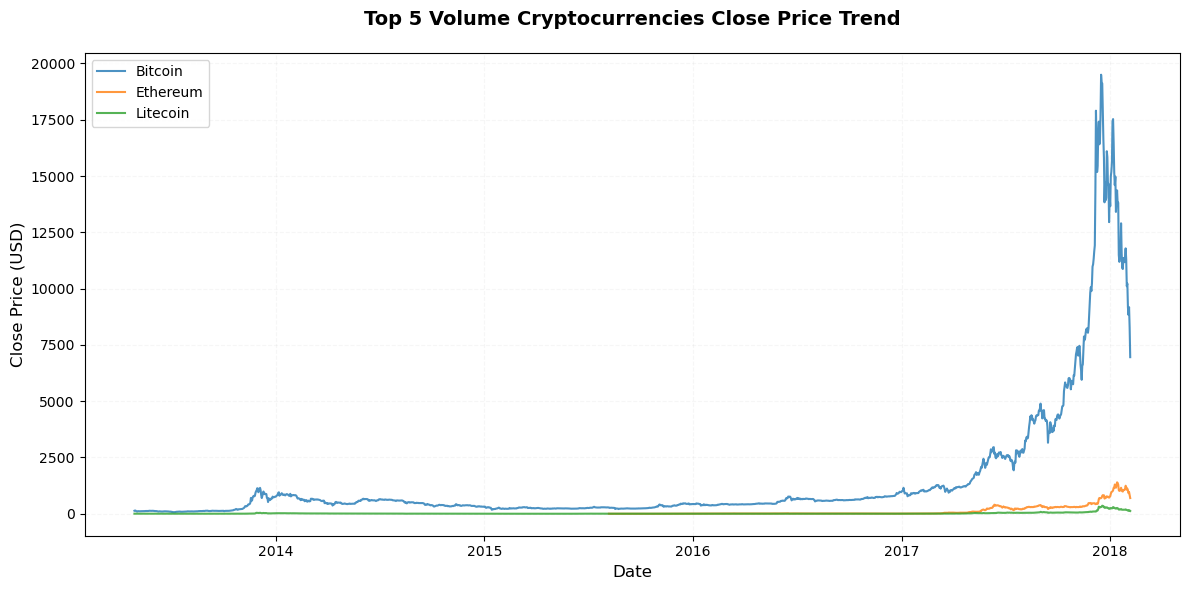


                                 📊 Chart 2: Daily Returns Histogram                                 
Shows the daily return distribution of 3 cryptocurrencies, reflecting the volatility characteristics and probability distribution of returns.


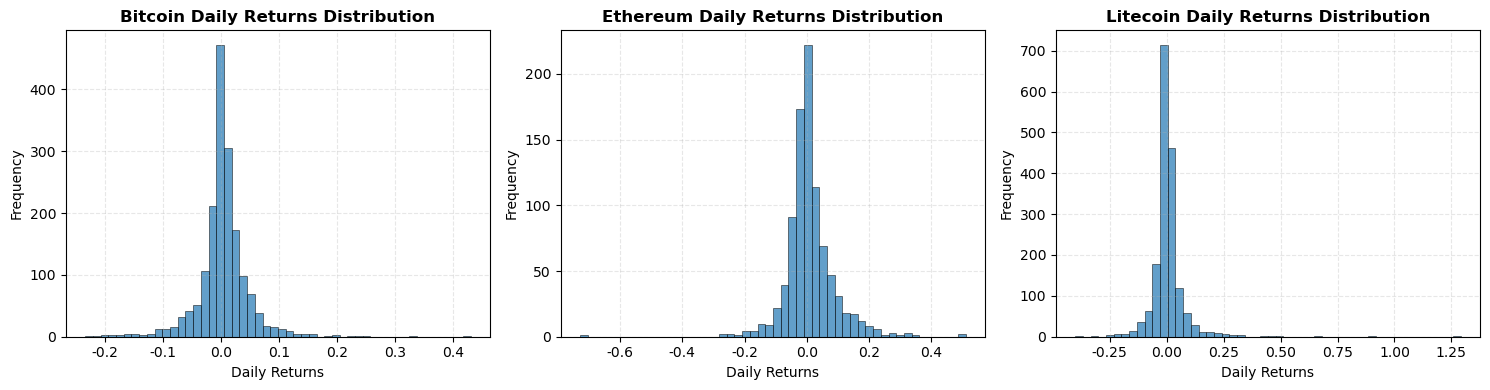


           🔥 Chart 3: Close Price Correlation Heatmap of Top 5 Cryptocurrencies by Volume           
Uses a heatmap to show the Pearson correlation coefficient of closing prices of the top 5 cryptocurrencies; the color depth reflects the strength of correlation (red for positive, blue for negative).


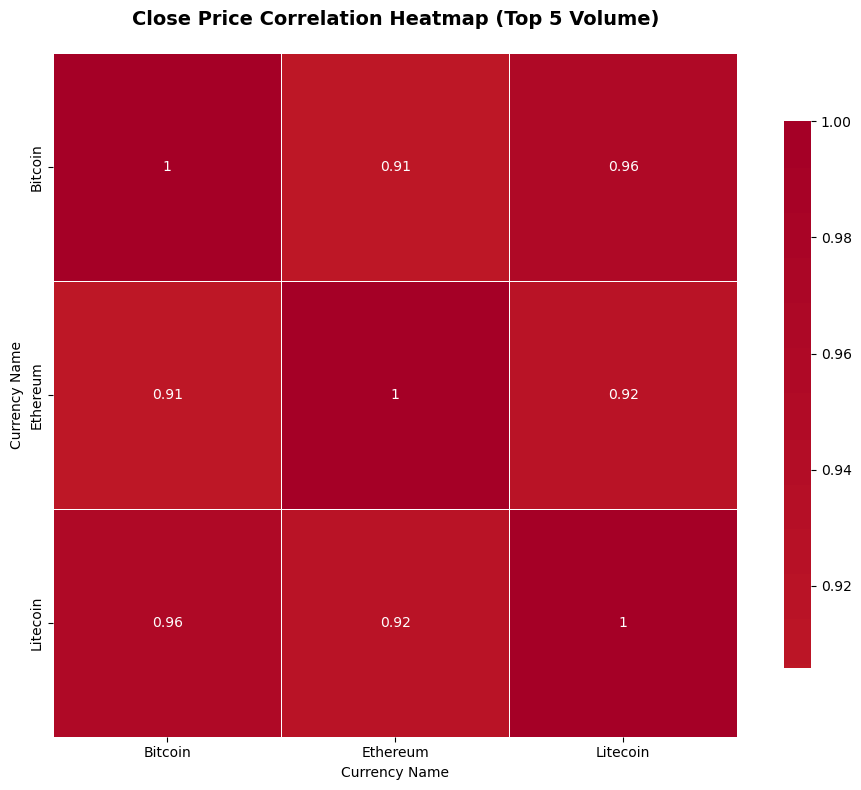


      📦 Chart 4: 20-Day Volatility Distribution of Top 5 Cryptocurrencies by Volume (Box Plot)      
Uses a box plot to show the 20-day rolling standard deviation (volatility) of the top 5 cryptocurrencies; the box reflects the median, quartiles, and outliers of volatility.


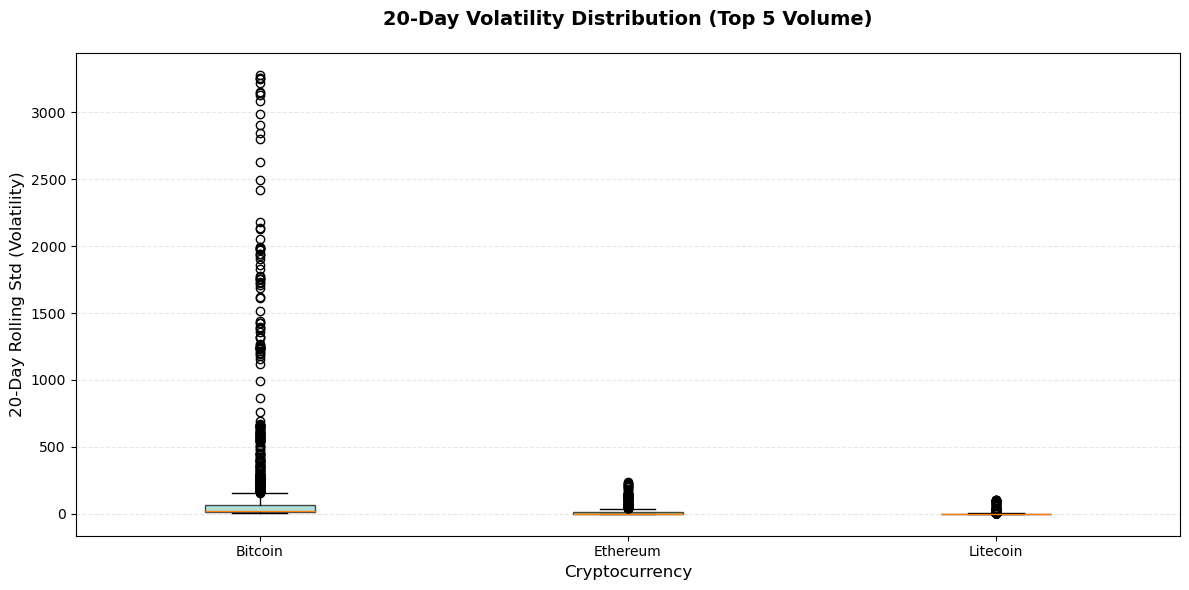


                           🔄 Chart 5: Bitcoin Price and Volume Pair Plot                            
Shows the pairwise relationships between closing price, logarithmic trading volume, opening price, highest price, and lowest price of a single cryptocurrency; the diagonal shows the kernel density distribution.


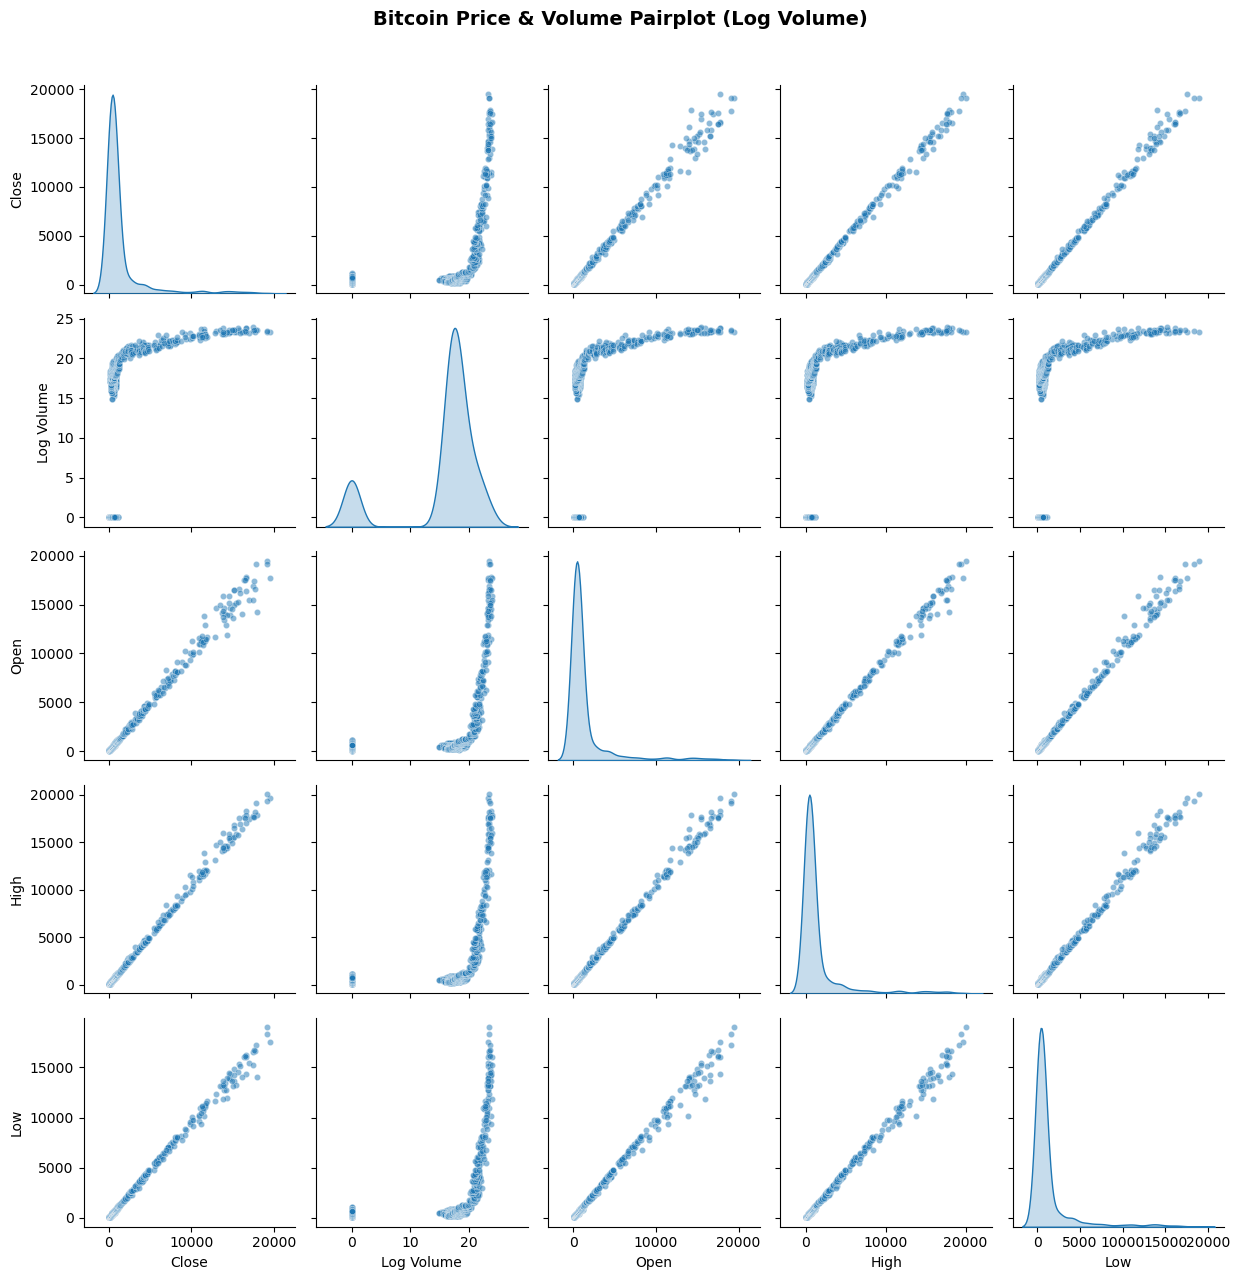


                📊 Chart 6: 20-Day Volatility Comparison between Bitcoin and Ethereum                
Compares the 20-day rolling standard deviation (volatility) of two cryptocurrencies, allowing intuitive observation of the synchronization and differences in volatility.


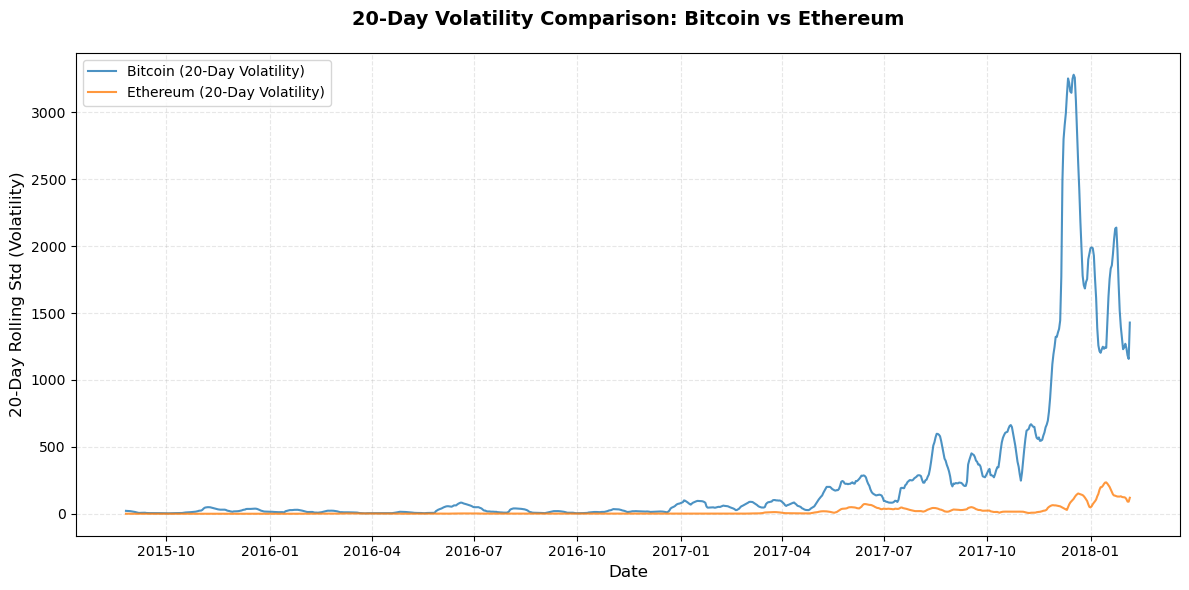


              🔥 Chart 7: Close Price Correlation Heatmap between Bitcoin and Ethereum               
Focuses on the closing price correlation of two cryptocurrencies, marking the Pearson coefficient (currently 0.9058) to intuitively reflect the degree of linkage.


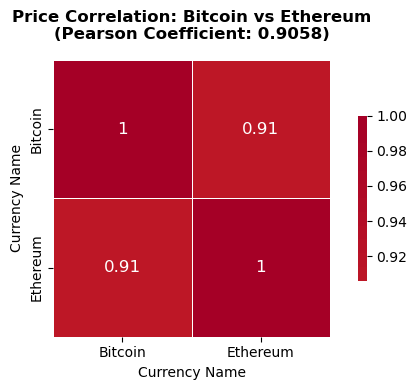


✅ Visualization completed! A total of 7 charts were generated



Do you want to execute the creative function (in-depth analysis of single cryptocurrency and time period)? (y/n):  y

[Creative Function - Target Currency Selection]
Please select 1 cryptocurrency for in-depth analysis (the time series rules of this cryptocurrency will be analyzed):  Bitcoin


✅ Target Currency Confirmed: Bitcoin
⏰ Valid Time Range for This Cryptocurrency: 2013-04-28 至 2018-02-05 (only time periods within this range can be selected)



[Creative Function - Time Period Selection] (Valid Range for Bitcoin: 2013-04-28 至 2018-02-05)
Please enter the start date (format: YYYY-MM-DD):  2016-05-05
Please enter the end date (format: YYYY-MM-DD):  2017-07-06


✅ Time Period Confirmed: 2016-05-05 to 2017-07-06

📊 Bitcoin Key Insights (2016-05-05 to 2017-07-06)
1. Return Performance: Cumulative return 482.29%, 261 days with positive returns, 164 days with negative returns
2. Price Range: Highest price 2958.11 USD, Lowest price 438.71 USD
3. Trend Feature: Mid-long term range-bound (based on 50-day moving average change)
4. Risk Feature: Medium volatility, Average 20-day volatility 63.68 USD


Press Enter to display creative function charts... 


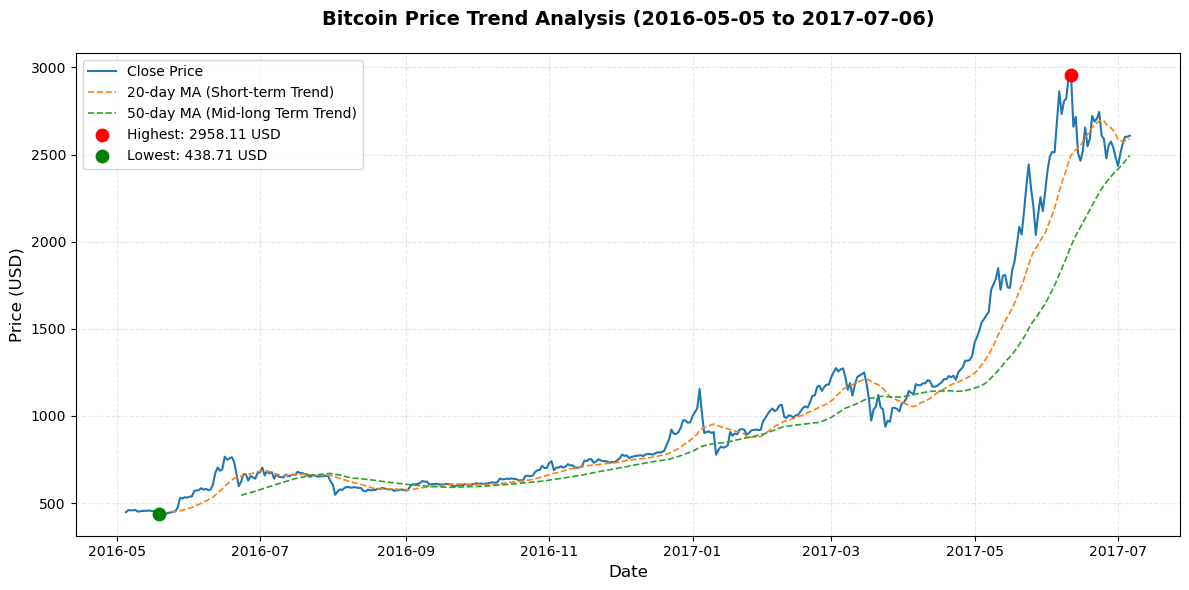

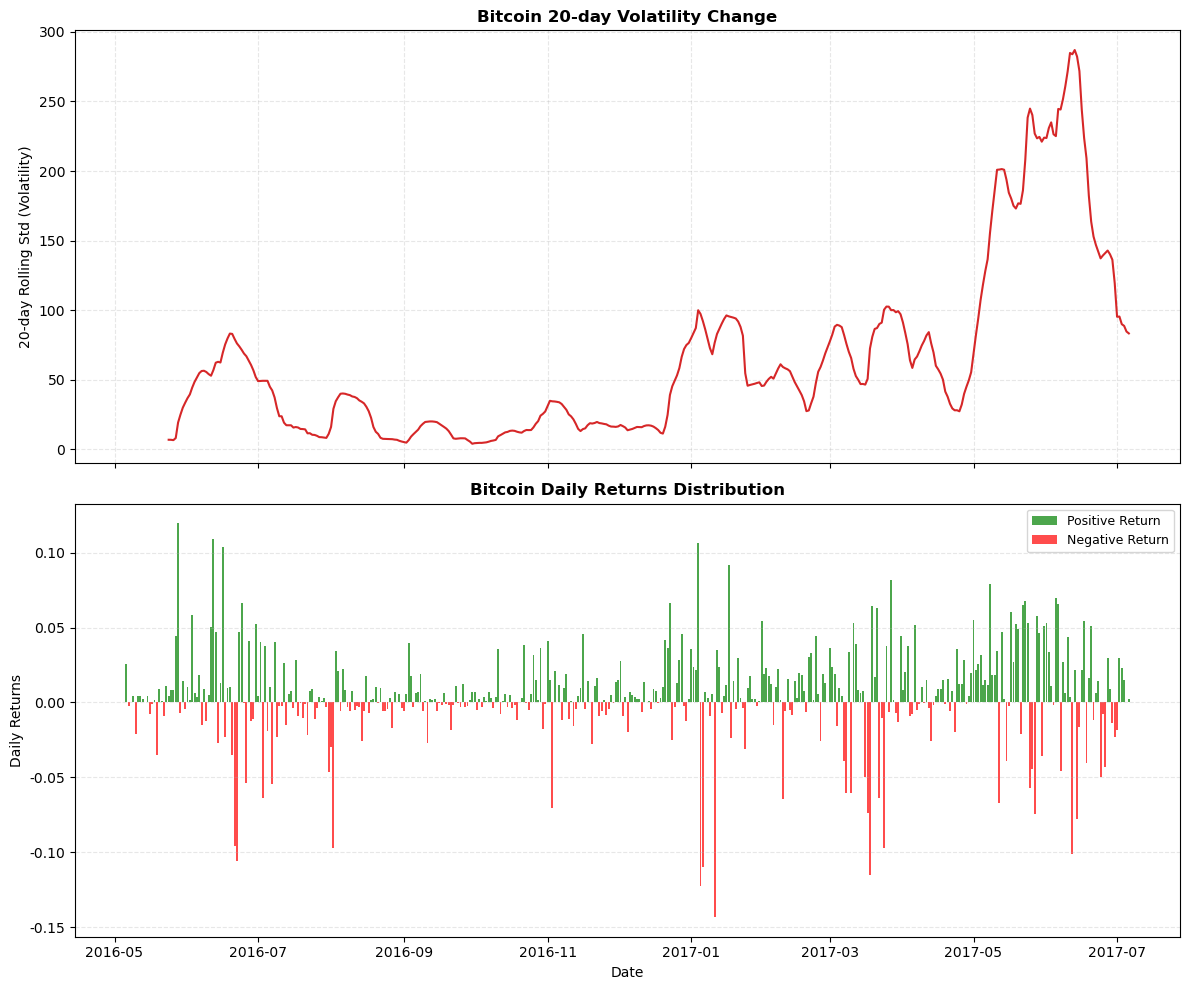

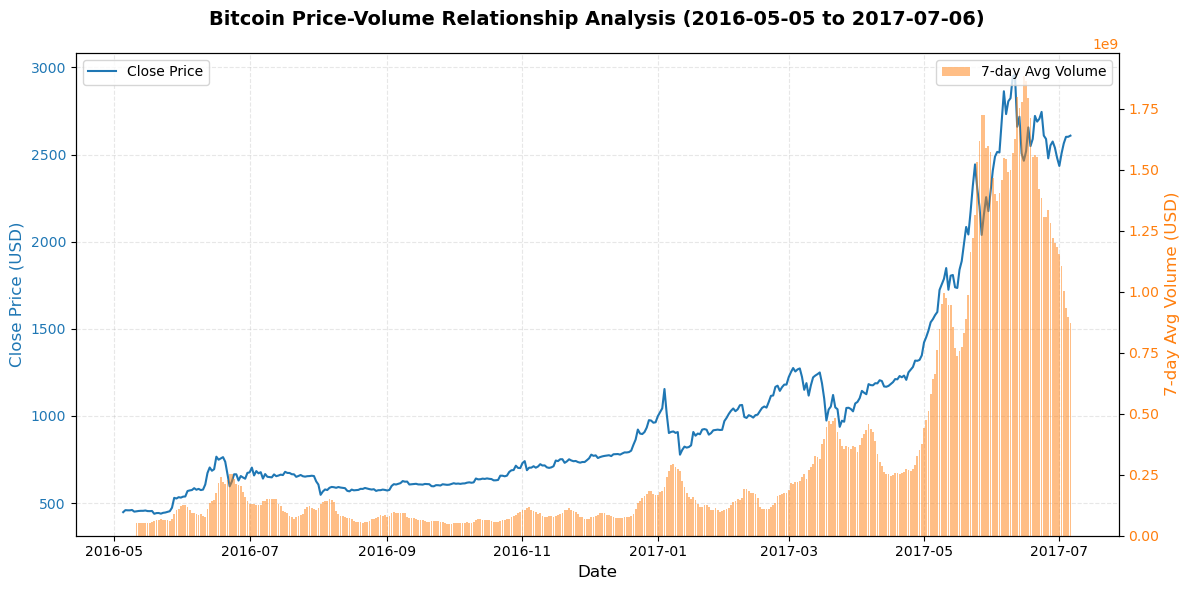

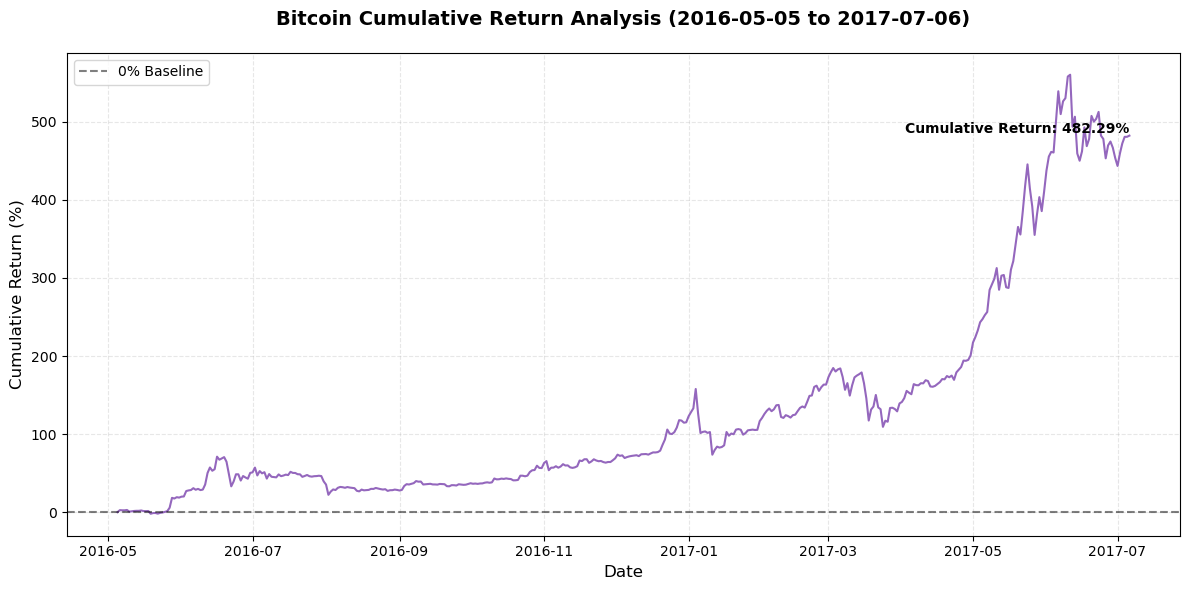


************************************************************************************************************************
                                  🎉 Cryptocurrency Data Explorer Execution Completed!                                   
************************************************************************************************************************


In [22]:
def main():
    print("*" * 120)
    print("📊 Cryptocurrency Data Explorer".center(120))
    print("*" * 120)
    
    # 1. Data loading and preprocessing
    while True:
        file_path = input("\nPlease enter the CSV dataset path (example: './crypto-markets.csv'): ").strip()
        try:
            df = load_data(file_path)
            break
        except Exception as e:
            print(f"❌ {e}, please re-enter!")
    
    # 2. Basic analysis: Currency input + statistical calculation
    try:
        core_currency_list, corr_vol_pair = get_currency_input(df)
        analysis_result = basic_analysis(df, core_currency_list, corr_vol_pair)
        # Print core results of basic analysis
        print(f"\n" + "*" * 120)
        print(f"📈 Core Results of Basic Analysis".center(120))
        print(f"*" * 120)
        print_analysis_results(analysis_result['core_stats'],analysis_result['corr_vol_result'])
    except Exception as e:
        print(f"❌ Basic analysis failed: {e}")
        return
    
    # 3. Basic visualization: Generate 5 types of charts required by the assignment
    try:
        print(f"\n" + "*" * 120)
        print(f"📈 Visualization Chart Results".center(120))
        print(f"*" * 120)
        core_figs = visualization_analysis(analysis_result)
    except Exception as e:
        print(f"❌ Basic visualization failed: {e}")
        return
    
    # 4. Creative function: In-depth analysis of single cryptocurrency + time period
    try:
        # Ask the user whether to execute the creative function
        creative_choice = input("\nDo you want to execute the creative function (in-depth analysis of single cryptocurrency and time period)? (y/n): ").strip().lower()
        if creative_choice == 'y':
            # Get input for creative function (currency + time period)
            creative_curr, start_date, end_date = creative_input(df)
            # Execute creative function analysis
            creative_figs, creative_insights = creative_analysis(df, creative_curr, start_date, end_date)
            # Display creative function charts
            input("Press Enter to display creative function charts...")
            for name, fig in creative_figs:
                plt.show()
        else:
            print("ℹ️ Creative function skipped")
    except Exception as e:
        print(f"❌ Creative function failed: {e}")
        return
    
    # Program ends
    print("\n" + "*" * 120)
    print("🎉 Cryptocurrency Data Explorer Execution Completed!".center(120))
    print("*" * 120)

# Start the program (execute only when this Notebook is run directly)
if __name__ == "__main__":
    main()